nb to find the normal vectors for a frb image in real space

In [1]:
import yt

In [2]:
ds = yt.load("IsolatedGalaxy/galaxy0030/galaxy0030")


yt : [INFO     ] 2021-07-07 14:30:40,559 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2021-07-07 14:30:40,560 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2021-07-07 14:30:40,560 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-07-07 14:30:40,561 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2021-07-07 14:30:40,561 Parameters: cosmological_simulation   = 0


In [3]:
normal_axis = 0 

In [5]:
slc = ds.slice(normal_axis, 0.5)

In [6]:
frb = slc.to_frb(1., (500, 600))

In [8]:
den = frb[('enzo', 'Density')]

yt : [INFO     ] 2021-07-07 14:31:50,274 Making a fixed resolution buffer of (('enzo', 'Density')) 500 by 600


In [9]:
den.shape

(600, 500)

In [11]:
image_x_len = den.shape[0]
image_y_len = den.shape[1]
[image_x_len, image_y_len]

[600, 500]

In [12]:
ds.coordinates._x_pairs

(('x', 'y'), ('y', 'z'), ('z', 'x'))

In [13]:
ds.coordinates.axis_order

('x', 'y', 'z')

In [14]:
ds.coordinates._x_axis

{'x': 1, 0: 1, 'y': 2, 1: 2, 'z': 0, 2: 0}

In [28]:
for normal_axis in ['x', 'y', 'z']:
    image_x_axisid = ds.coordinates._x_axis[normal_axis]
    image_y_axisid = ds.coordinates._y_axis[normal_axis]
    image_x_name = ds.coordinates.axis_order[image_x_axisid]
    image_y_name = ds.coordinates.axis_order[image_y_axisid]

    print(f"normal axis {normal_axis}")
    print(f"    x axis is {image_x_name}")
    print(f"    y axis is {image_y_name}")
    


normal axis x
    x axis is y
    y axis is z
normal axis y
    x axis is z
    y axis is x
normal axis z
    x axis is x
    y axis is y


In [32]:
def print_image_xy(normal_axis):
    image_x_axisid = ds.coordinates._x_axis[normal_axis]
    image_y_axisid = ds.coordinates._y_axis[normal_axis]
    image_x_name = ds.coordinates.axis_order[image_x_axisid]
    image_y_name = ds.coordinates.axis_order[image_y_axisid]

    print(f"normal axis {normal_axis}")
    print(f"    image's x axis is {image_x_name}")
    print(f"    image's y axis is {image_y_name}")

yt : [INFO     ] 2021-07-07 14:42:47,134 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-07-07 14:42:47,134 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-07-07 14:42:47,136 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-07-07 14:42:47,137 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-07-07 14:42:47,138 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800


normal axis x
    image's x axis is y
    image's y axis is z



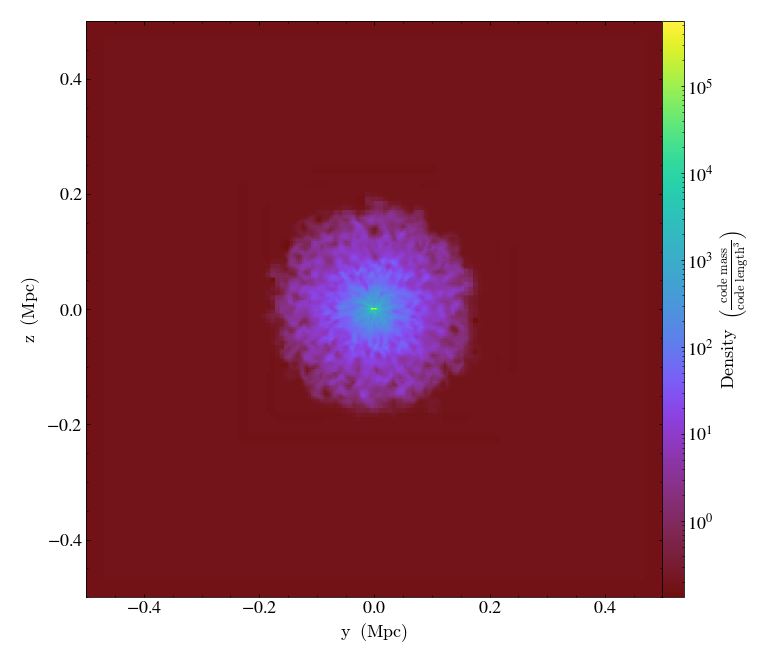

In [33]:
print_image_xy('x')
yt.SlicePlot(ds, 'x', ('enzo', 'Density'))

yt : [INFO     ] 2021-07-07 14:42:52,940 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-07-07 14:42:52,941 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-07-07 14:42:52,942 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-07-07 14:42:52,943 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-07-07 14:42:52,944 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800


normal axis y
    image's x axis is z
    image's y axis is x



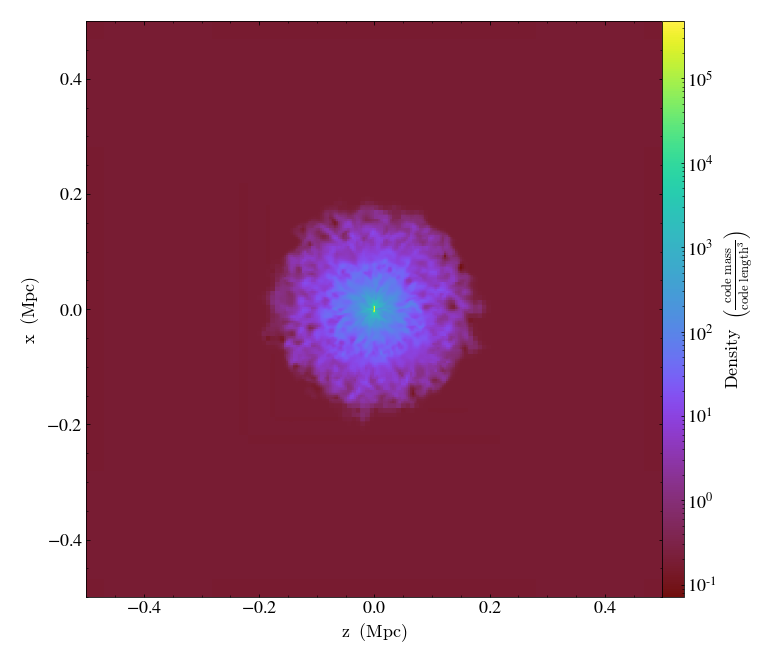

In [34]:
print_image_xy('y')
yt.SlicePlot(ds, 'y', ('enzo', 'Density'))

yt : [INFO     ] 2021-07-07 14:43:00,159 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-07-07 14:43:00,160 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-07-07 14:43:00,161 xlim = 0.000000 1.000000
yt : [INFO     ] 2021-07-07 14:43:00,161 ylim = 0.000000 1.000000
yt : [INFO     ] 2021-07-07 14:43:00,162 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800


normal axis z
    image's x axis is x
    image's y axis is y



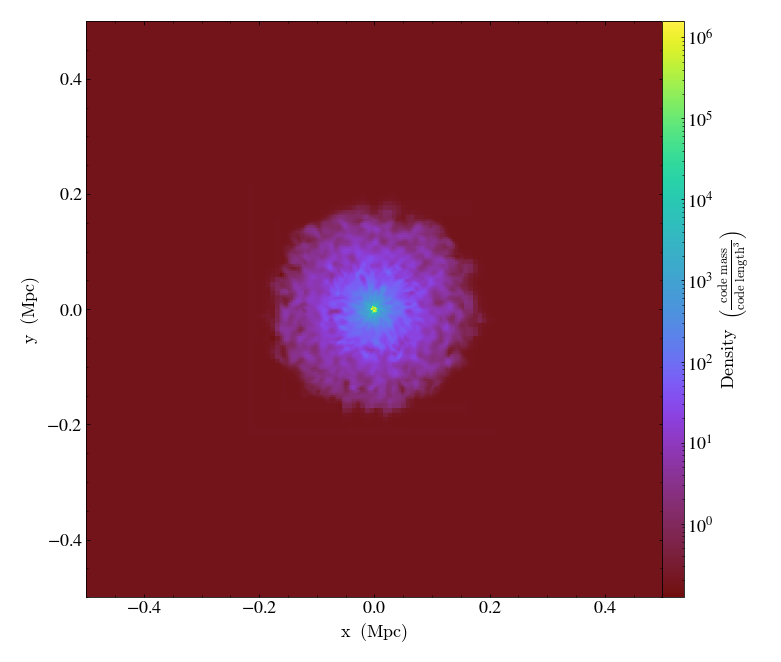

In [35]:
print_image_xy('z')
yt.SlicePlot(ds, 'z', ('enzo', 'Density'))

In [49]:
import numpy as np

def get_image_plane_vecs(normal_axis):

    normal_vec = np.zeros((3,))
    east_vec = np.zeros((3,))
    north_vec = np.zeros((3,))
    
    normal_axis_id = ds.coordinates.axis_id[normal_axis]
    normal_vec[normal_axis_id] = 1.
     
    image_x_axis_id = ds.coordinates._x_axis[normal_axis]
    east_vec[image_x_axis_id] = 1.
    
    image_y_axis_id = ds.coordinates._y_axis[normal_axis]
    north_vec[image_y_axis_id] = 1.

    return normal_vec, east_vec, north_vec

In [54]:
dict(zip(('normal', 'east', 'north'), get_image_plane_vecs('x')))

{'normal': array([1., 0., 0.]),
 'east': array([0., 1., 0.]),
 'north': array([0., 0., 1.])}

In [51]:
dict(zip(('normal', 'east', 'north'), get_image_plane_vecs('y')))

{'normal': array([0., 1., 0.]),
 'east': array([0., 0., 1.]),
 'north': array([1., 0., 0.])}

In [52]:
dict(zip(('normal', 'east', 'north'), get_image_plane_vecs('z')))

{'normal': array([0., 0., 1.]),
 'east': array([1., 0., 0.]),
 'north': array([0., 1., 0.])}